In [14]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.vq import whiten, kmeans, vq

In [2]:
# Read batman image and print dimensions
df = img.imread('data/batman.jpg')
df.shape

(169, 269, 3)

In [3]:
r = []
g = []
b = []

# Store RGB values of all pixels in lists r, g and b
for row in df:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [19]:
print(len(r), len(g), len(b))

45461 45461 45461


In [5]:
df = pd.DataFrame({'red': r, 'green': g, 'blue': b})
df.head()

,red,green,blue
0,37,27,25
1,36,22,19
2,48,22,23
3,54,30,30
4,32,17,22


In [7]:
df['scaled_red'] = whiten(df['red'])
df['scaled_green'] = whiten(df['green'])
df['scaled_blue'] = whiten(df['blue'])

In [20]:
df.head()

,red,green,blue,scaled_red,scaled_green,scaled_blue
0,37,27,25,0.464893,0.357715,0.281166
1,36,22,19,0.452328,0.291471,0.213686
2,48,22,23,0.603104,0.291471,0.258673
3,54,30,30,0.678492,0.397461,0.337399
4,32,17,22,0.402069,0.225228,0.247426


In [21]:
df.shape

(45461, 6)

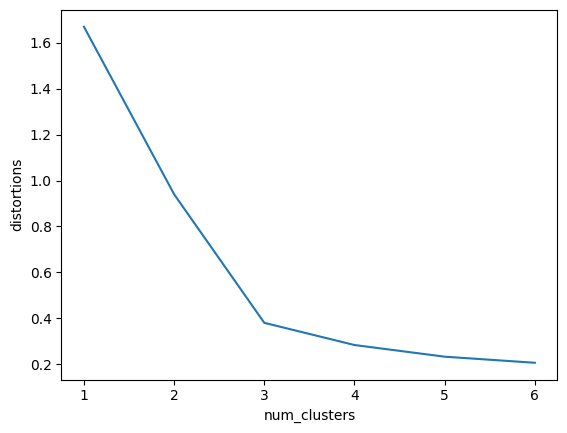

In [15]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [22]:
elbow_plot.shape

(6, 2)

In [24]:
cluster_centers, _ = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 3)

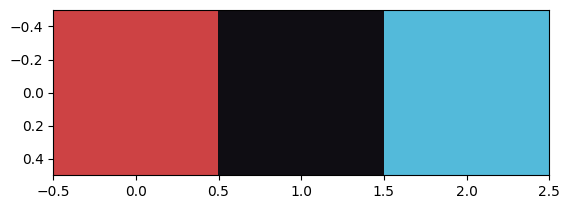

In [26]:
# Get standard deviations of each color
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()